## Assignment 6: Reduction of dimensionality and recognition
Machine perception<br>
2023/2024

In [1]:
import numpy as np
import a6_utils as a6
import cv2
from matplotlib import pyplot as plt
import matplotlib.patches as patches

### Exercise 1: Direct PCA method

#### (a)

In [2]:
# na papirju

#### (b)

In [3]:
def pca2d_b(filename):
    points = np.loadtxt(filename)
    X = points.T
    mi = np.mean(X, axis=1)
    Xd = X - mi[:, np.newaxis]
    C = 1/(len(points)-1) * np.dot(Xd, Xd.T)
    U, S, V = np.linalg.svd(C)

    # plt.figure(figsize=(7,5))
    plt.scatter(points[:,0], points[:,1])
    a6.drawEllipse(mi, C, 1)
    plt.show()

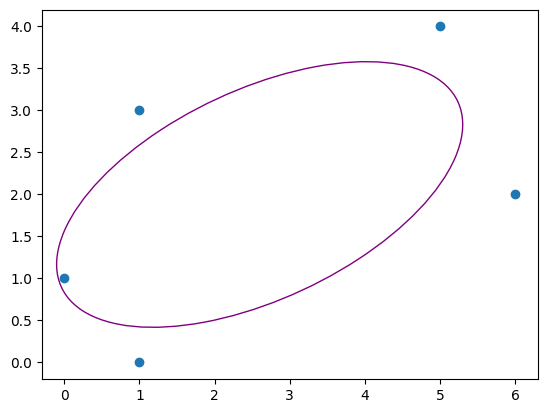

In [4]:
filename = "data/points.txt"
pca2d_b(filename)

#### (c)

In [5]:
def pca2d_c(filename):
    points = np.loadtxt(filename)
    X = points.T
    mi = np.mean(X, axis=1)
    Xd = X - mi[:, np.newaxis]
    C = 1/(len(points)-1) * np.dot(Xd, Xd.T)
    U, S, V = np.linalg.svd(C)

    # plt.figure(figsize=(7,5))
    plt.scatter(points[:,0], points[:,1])
    a6.drawEllipse(mi, C, 1)

    evcs = [U[:,i] for i in range(U.shape[1])]
    evls = [S[i] for i in range(len(S))]
    evcs = [evcs[i]*np.sqrt(evls[i]) for i in range(len(evcs))]

    hardcoded_colors = ("red", "green")
    for i in range(len(evcs)):
        plt.plot([mi[0], mi[0]+evcs[i][0]], [mi[1], mi[1]+evcs[i][1]], color=hardcoded_colors[i])
    
    plt.show()
    return evcs, evls

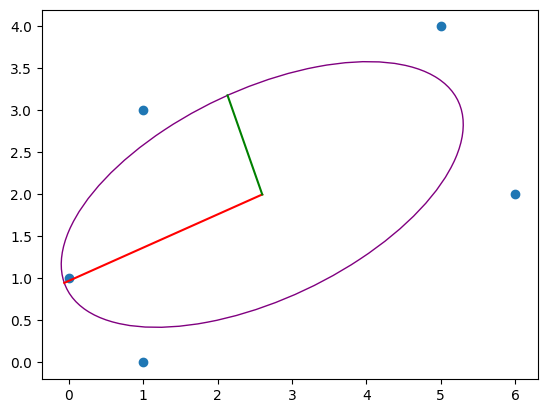

In [6]:
e1eigenvecs, e1eigenvals = pca2d_c(filename)

#### (d)

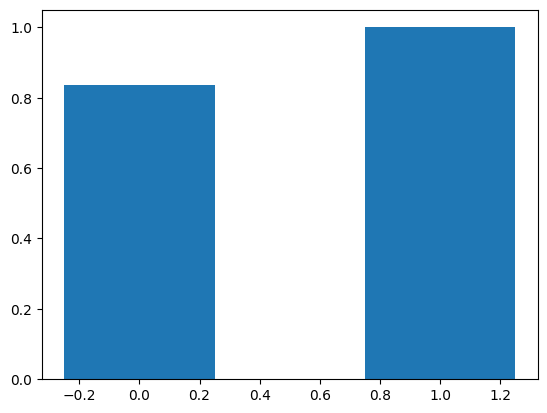

In [7]:
e1cs = np.cumsum(e1eigenvals)
e1cs = e1cs / np.max(e1cs)

plt.bar(range(len(e1cs)), e1cs, width=0.5)
plt.show()

In [8]:
print("Percent of information retained when discarding the second eigenvector:", round(e1cs[0],3)*100)

Percent of information retained when discarding the second eigenvector: 83.6


#### (e)

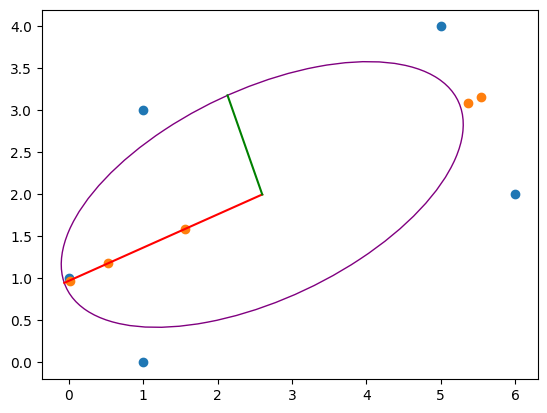

In [9]:
# def pca2d_c(filename):
points = np.loadtxt(filename)
X = points.T
mi = np.mean(X, axis=1)
Xd = X - mi[:, np.newaxis]
C = 1/(len(points)-1) * np.dot(Xd, Xd.T)
U, S, V = np.linalg.svd(C)

# plt.figure(figsize=(7,5))
plt.scatter(points[:,0], points[:,1])
a6.drawEllipse(mi, C, 1)

evcs = [U[:,i] for i in range(U.shape[1])]
evls = [S[i] for i in range(len(S))]
evcs = [evcs[i]*np.sqrt(evls[i]) for i in range(len(evcs))]

hardcoded_colors = ("red", "green")
for i in range(len(evcs)):
    plt.plot([mi[0], mi[0]+evcs[i][0]], [mi[1], mi[1]+evcs[i][1]], color=hardcoded_colors[i])

yd = np.dot(U.T, X-mi[:, np.newaxis])
U[:, 1] = 0 #second eigenvector -> lowest variance
e1xq = np.dot(U, yd) + mi[:, np.newaxis]

plt.scatter(e1xq[0], e1xq[1])

plt.show()

#### (f)

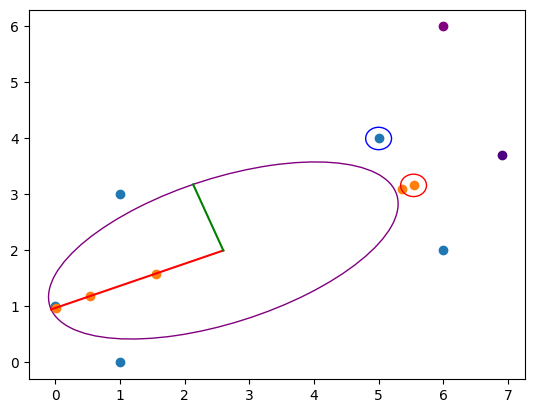

In [10]:
# plt.figure(figsize=(6,5))

qpoint=np.array((6, 6))
qpDist = []
for p in points:
    qpDist.append(np.linalg.norm(qpoint - p))
e1closest = np.argmin(qpDist) #index of closest point
plt.scatter(qpoint[0], qpoint[1], color="purple")

points = np.loadtxt(filename)
X = points.T
mi = np.mean(X, axis=1)
Xd = X - mi[:, np.newaxis]
C = 1/(len(points)-1) * np.dot(Xd, Xd.T)
U, S, V = np.linalg.svd(C)

plt.scatter(points[:,0], points[:,1])
a6.drawEllipse(mi, C, 1)

evcs = [U[:,i] for i in range(U.shape[1])]
evls = [S[i] for i in range(len(S))]
evcs = [evcs[i]*np.sqrt(evls[i]) for i in range(len(evcs))]

hardcoded_colors = ("red", "green")
for i in range(len(evcs)):
    plt.plot([mi[0], mi[0]+evcs[i][0]], [mi[1], mi[1]+evcs[i][1]], color=hardcoded_colors[i])

newX = np.concatenate((X,qpoint.reshape((2,1))), axis=1)
yd = np.dot(U.T, newX-mi[:, np.newaxis])
U[:, 1] = 0 #second eigenvector -> lowest variance
e1xq2 = np.dot(U, yd) + mi[:, np.newaxis]

plt.scatter(e1xq2[0,:-1], e1xq2[1,:-1])
plt.scatter(e1xq2[0,-1], e1xq2[1,-1], color="indigo")

qpointAfter = e1xq2[:,-1]
qpDistAfter = []
for p in e1xq2.T[:-1]:
    qpDistAfter.append(np.linalg.norm(qpointAfter - p))
e1closestAfter = np.argmin(qpDistAfter) #index of closest point

circle = patches.Circle((points[e1closest][0], points[e1closest][1]), 0.2, edgecolor='blue', facecolor='none', linewidth=1)
plt.gca().add_patch(circle)
circle = patches.Circle((e1xq2.T[e1closestAfter][0], e1xq2.T[e1closestAfter][1]), 0.2, edgecolor='red', facecolor='none', linewidth=1)
plt.gca().add_patch(circle)

plt.show()

In [11]:
print("Closest point before:", points[e1closest])
print("Closest point after:", e1xq2.T[e1closestAfter])

Closest point before: [5. 4.]
Closest point after: [5.54021325 3.16269992]


### Exercise 2: The dual PCA method

#### (a)

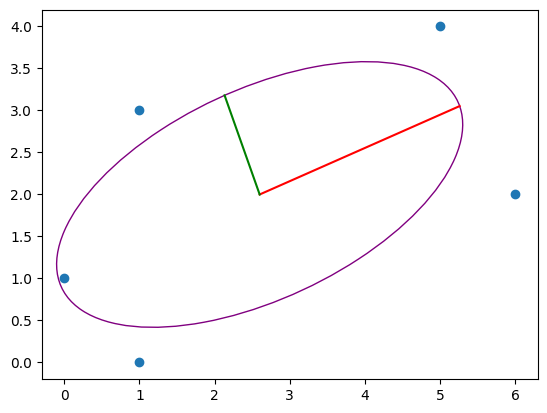

In [12]:
points = np.loadtxt(filename)
X = points.T
mi = np.mean(X, axis=1)
Xd = X - mi[:, np.newaxis]
C2 = 1/(len(points)-1) * np.dot(Xd.T, Xd) #this is now different
U, S, V = np.linalg.svd(C2)
U = np.dot(np.dot(Xd, U), np.diag(np.sqrt(1/(S * (len(points)-1)))))

# plt.figure(figsize=(7,5))
plt.scatter(points[:,0], points[:,1])
a6.drawEllipse(mi, C, 1)

evcs = [U[:,i] for i in range(2)]
evls = [S[i] for i in range(2)]
evcs = [evcs[i]*np.sqrt(evls[i]) for i in range(len(evcs))]

hardcoded_colors = ("red", "green")
for i in range(len(evcs)):
    plt.plot([mi[0], mi[0]+evcs[i][0]], [mi[1], mi[1]+evcs[i][1]], color=hardcoded_colors[i])

plt.show()

In [13]:
print(U)
U[np.abs(U) < 1e-7] = 0
print(U)

[[ 9.29929353e-01 -3.67738219e-01  1.30814104e-08  7.83498086e-09
   1.29444227e-09]
 [ 3.67738219e-01  9.29929353e-01  6.76646414e-09  5.14130943e-09
   0.00000000e+00]]
[[ 0.92992935 -0.36773822  0.          0.          0.        ]
 [ 0.36773822  0.92992935  0.          0.          0.        ]]


#### (b)

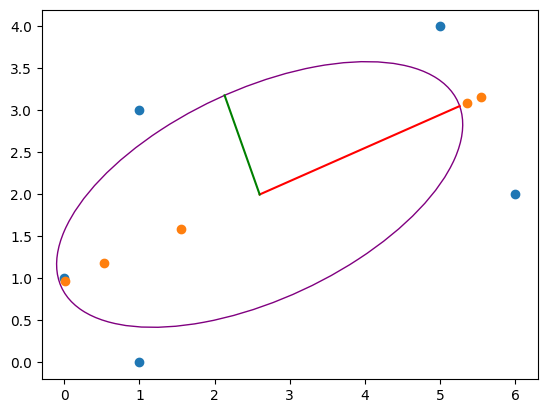

In [14]:
points = np.loadtxt(filename)
X = points.T
mi = np.mean(X, axis=1)
Xd = X - mi[:, np.newaxis]
C2 = 1/(len(points)-1) * np.dot(Xd.T, Xd) #this is now different
U, S, V = np.linalg.svd(C2)
U = np.dot(np.dot(Xd, U), np.diag(np.sqrt(1/(S * (len(points)-1)))))
U[np.abs(U) < 1e-7] = 0

# plt.figure(figsize=(7,5))
plt.scatter(points[:,0], points[:,1])
a6.drawEllipse(mi, C, 1)

evcs = [U[:,i] for i in range(2)]
evls = [S[i] for i in range(2)]
evcs = [evcs[i]*np.sqrt(evls[i]) for i in range(len(evcs))]

hardcoded_colors = ("red", "green")
for i in range(len(evcs)):
    plt.plot([mi[0], mi[0]+evcs[i][0]], [mi[1], mi[1]+evcs[i][1]], color=hardcoded_colors[i])

yd = np.dot(U.T, X-mi[:, np.newaxis])
U[:, 1] = 0 #second eigenvector -> lowest variance
e2xq = np.dot(U, yd) + mi[:, np.newaxis]

plt.scatter(e2xq[0], e2xq[1])

plt.show()

In [15]:
e1xq - e2xq

array([[-1.77635684e-15,  1.77635684e-15,  3.55271368e-15,
        -1.33226763e-15, -2.66453526e-15],
       [-6.66133815e-16,  4.44089210e-16,  8.88178420e-16,
        -4.44089210e-16, -8.88178420e-16]])

### Exercise 3: Image decomposition examples

#### (a)

In [16]:
series = 1
faces_images = []
for i in range(1,65):
    img = cv2.imread("data/faces/%d/%03d.png" % (series, i))
    if img is None: raise ValueError
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    faces_images.append(img)
m, n = faces_images[0].shape

In [17]:
matrix = np.zeros((m*n, 64))
for i in range(64):
    matrix[:,i] = faces_images[i].flatten()

#### (b)

In [18]:
def dualPcaImgs(matrix):
    X = matrix
    N = len(matrix[0])
    mi = np.mean(X, axis=1)
    Xd = X - mi[:, np.newaxis]
    C = 1/(N-1) * np.dot(Xd.T, Xd)
    U, S, V = np.linalg.svd(C)
    S = S + 10e-15
    U = np.dot(np.dot(Xd, U), np.diag(np.sqrt(1/(S * (N-1)))))
    #U[np.abs(U) < 1e-7] = 0
    return U, mi

In [19]:
e3evcs, e3mean = dualPcaImgs(matrix)

first5 = []
for i in range(5):
    img = np.reshape(e3evcs[:,i], (m, n))
    first5.append(img)

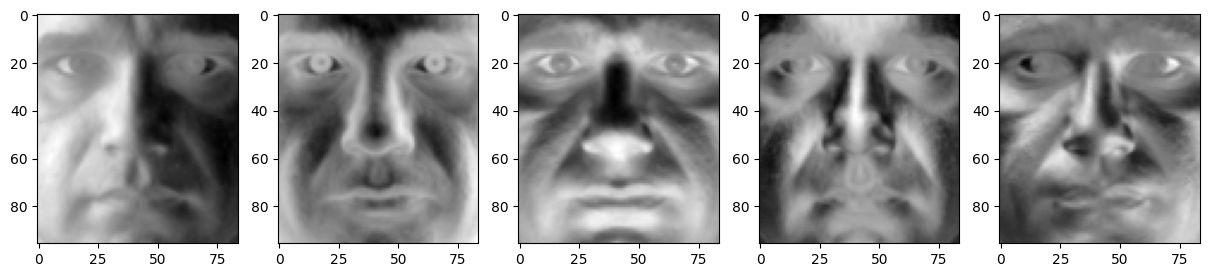

In [20]:
plt.figure(figsize=(15,3))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(first5[i],cmap="gray")
plt.show()

In [21]:
img1 = faces_images[0].flatten()

toPca1 = np.dot(e3evcs.T, (img1 - e3mean))
back1 = np.dot(e3evcs, toPca1) + e3mean

dimDelImg = np.copy(img1)
dimDelImg[4078] = 0

toPca2 = np.dot(e3evcs.T, (img1 - e3mean))
toPca2[0] = 0
back2 = np.dot(e3evcs, toPca2) + e3mean
toPca3 = np.dot(e3evcs.T, (img1 - e3mean))
toPca3[1] = 0
back3 = np.dot(e3evcs, toPca3) + e3mean

In [22]:
toPca2[:5]

array([    0.        , -3413.70187914,   283.82250971,   157.12184715,
          14.77750235])

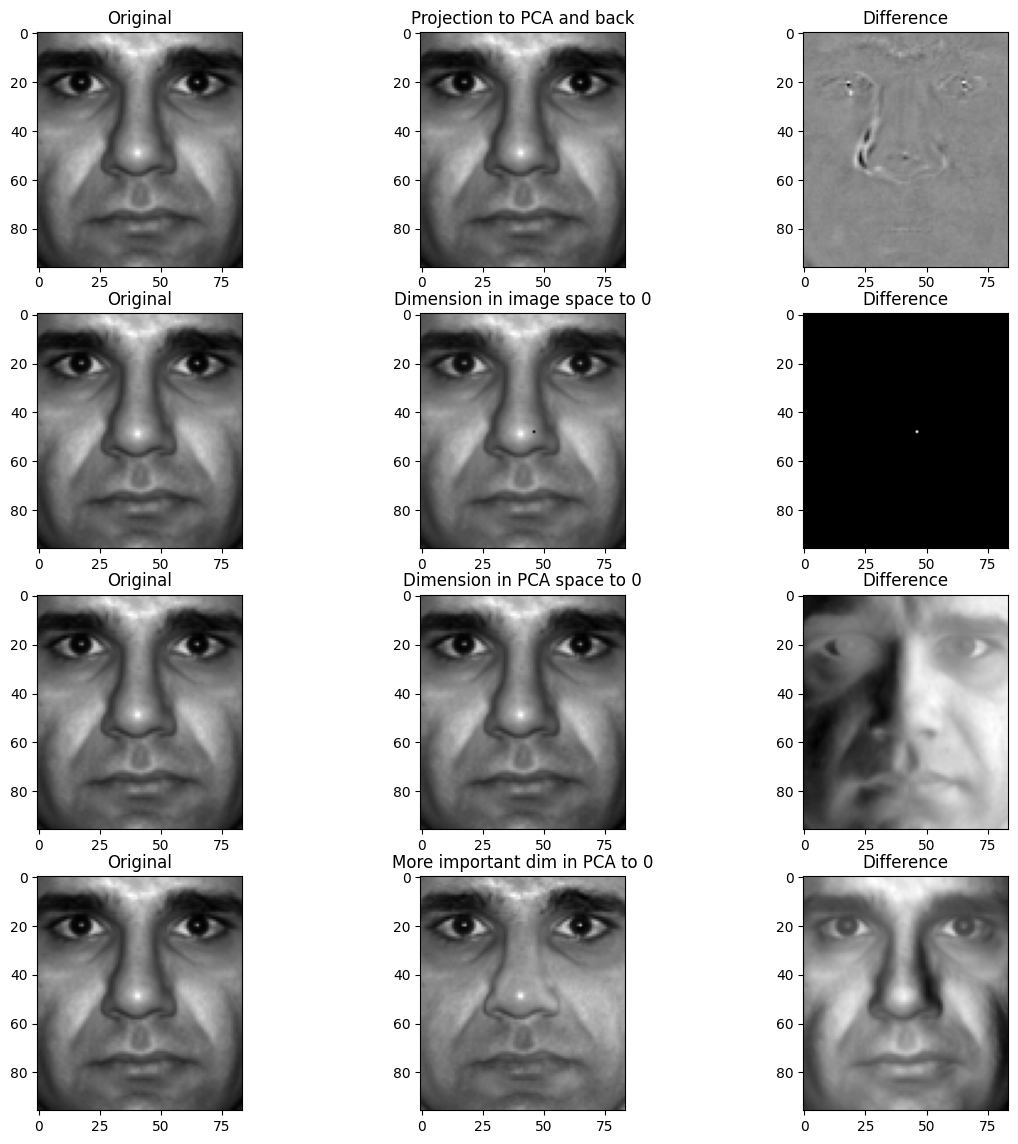

In [23]:
img1 = img1.reshape((96,84))
back1 = back1.reshape((96,84))
dimDelImg = dimDelImg.reshape((96,84))
back2 = back2.reshape((96,84))
back3 = back3.reshape((96,84))

plt.figure(figsize=(14,14))
spl_rows, spl_cols = 4, 3
plt.subplot(spl_rows, spl_cols,1)
plt.imshow(img1, cmap="gray")
plt.title("Original")
plt.subplot(spl_rows, spl_cols,4)
plt.imshow(img1, cmap="gray")
plt.title("Original")
plt.subplot(spl_rows, spl_cols,7)
plt.imshow(img1, cmap="gray")
plt.title("Original")
plt.subplot(spl_rows, spl_cols,2)
plt.imshow(back1, cmap="gray")
plt.title("Projection to PCA and back")
plt.subplot(spl_rows, spl_cols,5)
plt.imshow(dimDelImg, cmap="gray")
plt.title("Dimension in image space to 0")
plt.subplot(spl_rows, spl_cols,8)
plt.imshow(back2, cmap="gray")
plt.title("Dimension in PCA space to 0")
plt.subplot(spl_rows, spl_cols,3)
plt.imshow(img1 - back1, cmap="gray")
plt.title("Difference")
plt.subplot(spl_rows, spl_cols,6)
plt.imshow(img1 - dimDelImg, cmap="gray")
plt.title("Difference")
plt.subplot(spl_rows, spl_cols,9)
plt.imshow(img1 - back2, cmap="gray")
plt.title("Difference")
plt.subplot(spl_rows, spl_cols,10)
plt.imshow(img1, cmap="gray")
plt.title("Original")
plt.subplot(spl_rows, spl_cols,11)
plt.imshow(back3, cmap="gray")
plt.title("More important dim in PCA to 0")
plt.subplot(spl_rows, spl_cols,12)
plt.imshow(img1 - back3, cmap="gray")
plt.title("Difference")
plt.show()

#### (c)

In [24]:
retain = (32, 16, 8, 4, 2, 1)
random_img = faces_images[np.random.randint(1, 65)].flatten()
randBacks = []
for r in retain:
    randToPca = np.dot(e3evcs.T, (random_img - e3mean))
    # print(randToPca)
    randToPca[r::] = 0
    # print(randToPca)
    randBack = np.dot(e3evcs, randToPca) + e3mean
    randBacks.append(randBack.reshape((96,84)))

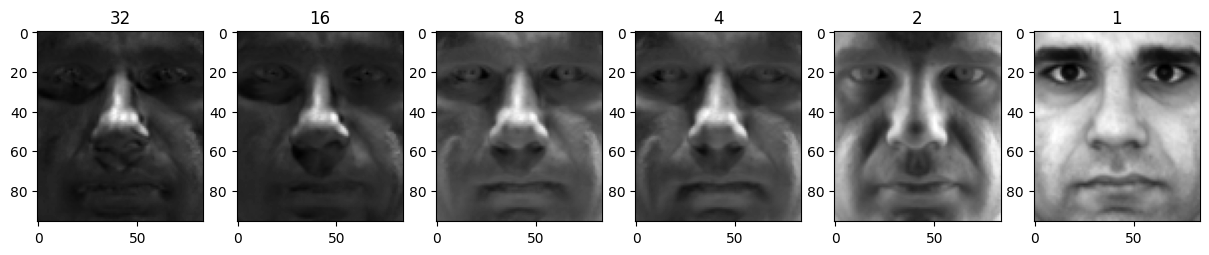

In [25]:
plt.figure(figsize=(15,5))
for i in range(len(retain)):
    plt.subplot(1,len(retain),i+1)
    plt.title(retain[i])
    plt.imshow(randBacks[i], cmap="gray")

#### (d)

In [26]:
series = 2
faces_images_2 = []
flattened_imgs_2 = []
for i in range(1,65):
    img = cv2.imread("data/faces/%d/%03d.png" % (series, i))
    if img is None: raise ValueError
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    faces_images_2.append(img)
    flattened_imgs_2.append(img.flatten())
m, n = faces_images_2[0].shape

In [27]:
# avgtest = np.zeros_like(flattened_imgs_2[0]).astype(np.uint32)
# for i in range(len(flattened_imgs_2)):
#     avgtest = avgtest + flattened_imgs_2[i]
# avgtest = avgtest / len(flattened_imgs_2)
# avgtest == avg_img

In [28]:
avg_img = np.mean(flattened_imgs_2, axis=0)
matrix2 = np.zeros((m*n, 64))
for i in range(64):
    matrix2[:,i] = faces_images_2[i].flatten()
i2evcs, i2mean = dualPcaImgs(matrix2)

avg_img_pca = np.dot(i2evcs.T, (avg_img - i2mean))
avg_img_pca[1] = 3000
avg_img_back = np.dot(i2evcs, avg_img_pca) + i2mean

In [29]:
print(avg_img)
print(avg_img_back)

[71.71875  74.5625   76.609375 ... 56.84375  55.453125 53.890625]
[110.85675733 111.57198905 110.98925809 ...  25.89103338  25.67979232
  25.75629635]


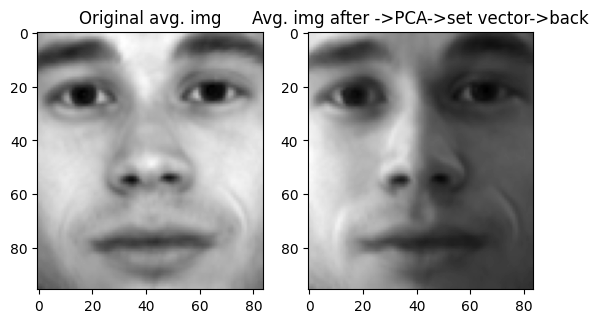

In [30]:
plt.subplot(1,2,1)
plt.imshow(avg_img.reshape((m,n)), cmap="gray")
plt.title("Original avg. img")
plt.subplot(1,2,2)
plt.imshow(avg_img_back.reshape((m,n)), cmap="gray")
plt.title("Avg. img after ->PCA->set vector->back")
plt.show()

In [31]:
scaling_x = 2500
linspc1 = np.linspace(-np.pi, np.pi, 50)
vals1 = np.sin(linspc1)
frames = []
base_avg_img_pca = np.dot(i2evcs.T, (avg_img - i2mean))
for i in range(len(vals1)):
    frame_img = base_avg_img_pca
    frame_img[1] = vals1[i] * scaling_x
    frame_back = np.dot(i2evcs, frame_img) + i2mean
    frames.append(frame_back.reshape((m,n)))
    # print(i)
    # print(vals1[i])
    # print(frame_img)
    # print(frame_back)

In [ ]:
for f in frames:
   img = plt.imshow(f, cmap="gray")
   plt.pause(0.075)
   plt.draw()

In [ ]:
scaling_x = 3000
linspc1 = np.linspace(-np.pi, np.pi, 50)
vals1 = np.sin(linspc1)
vals2 = np.cos(linspc1)
frames = []
base_avg_img_pca = np.dot(i2evcs.T, (avg_img - i2mean))
for i in range(len(vals1)):
    frame_img = base_avg_img_pca
    frame_img[0] = vals1[i] * scaling_x
    frame_img[2] = vals2[i] * scaling_x
    frame_back = np.dot(i2evcs, frame_img) + i2mean
    frames.append(frame_back.reshape((m,n)))
for f in frames:
   img = plt.imshow(f, cmap="gray")
   plt.pause(0.075)
   plt.draw()

#### (e)

In [34]:
series = 1
faces1 = []
for i in range(1,65):
    img = cv2.imread("data/faces/%d/%03d.png" % (series, i))
    if img is None: raise ValueError
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    faces1.append(img)
m, n = faces1[0].shape

matrix = np.zeros((m*n, 64))
for i in range(64):
    matrix[:,i] = faces_images[i].flatten()

i1evcs, i1mean = dualPcaImgs(matrix)

elephant = cv2.imread("data/elephant.jpg")
elephant = cv2.cvtColor(elephant, cv2.COLOR_RGB2GRAY)
ele_vec = elephant.flatten()
ele_pca = np.dot(i1evcs.T, (ele_vec - i1mean))
ele_back = np.dot(i1evcs, ele_pca) + i1mean
ele_back_im = ele_back.reshape(elephant.shape)

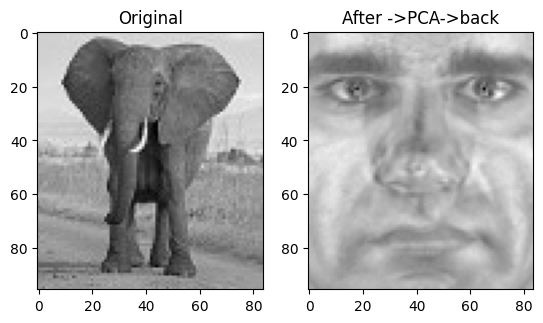

In [35]:
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(elephant, cmap="gray")
plt.subplot(1,2,2)
plt.title("After ->PCA->back")
plt.imshow(ele_back_im, cmap="gray")
plt.show()

In [36]:
# In the reconstructed image we can see the features of the faces that the PCA space was computed for. 

#### (f)

In [37]:
my_faces = []
num_of_imgs = 16
for i in range(num_of_imgs):
    img = cv2.imread("myData/transformed/ver3/%d.jpg" % i)
    if img is None: raise ValueError
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    my_faces.append(img)
m, n = my_faces[0].shape

In [38]:
matrix = np.zeros((m*n, num_of_imgs))
for i in range(num_of_imgs):
    matrix[:,i] = my_faces[i].flatten()

myFaceEvcs, myFaceMean = dualPcaImgs(matrix)

In [43]:
haar = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
capture = cv2.VideoCapture(0)

while True:
    _, frame = capture.read() #get frame from cam

    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = haar.detectMultiScale(frame_gray, 1.1, 4) #detect the faces

    for (x, y, w, h) in faces: #process each face
        
        face_regions = frame[y:y+h, x:x+w] #regions of the frame with a detected face
        # print(face_regions.shape)
        
        face_regions_res = cv2.resize(face_regions, (m, n), interpolation=cv2.INTER_AREA)
        # face_regs_gray = cv2.cvtColor(face_regions_res, cv2.COLOR_RGB2GRAY)
        face_regs_before = cv2.cvtColor(face_regions_res, cv2.COLOR_RGB2GRAY).flatten()
        face_regs_pca = np.dot(myFaceEvcs.T, (face_regs_before - myFaceMean))
        face_regs_back = np.dot(myFaceEvcs, face_regs_pca) + myFaceMean
        similarity = np.linalg.norm(face_regs_before - face_regs_back)

        # print(similarity)
        color = (255, 255, 255)
        text = ""
        if similarity < 14500:
            color = (0, 255, 0)
            text = "Ziga"
        else:
            color = (0, 0, 255)
            text = "Unknown"

        cv2.putText(frame, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        # cv2.putText(frame, str(similarity), (x + w - 200, y + h + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
        cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)

    cv2.imshow('img', frame) #draw to window

    keyPress = cv2.waitKey(30) & 0xff #look for key presses
    if keyPress == 27:
        #stop if escape is pressed
        break

capture.release()
cv2.destroyAllWindows()